# This program is developed by Soheil Hekmat for Question2 par c(Cart pole)

Importing Libraries

In [1]:
import gym
import numpy as np
import random
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
import warnings
warnings.filterwarnings('ignore')
clear_output()

Making environment of Cliff walking using 'gym AI toy text' and specifying it

we wanna see environment's features

In [2]:
env = gym.make('CartPole-v1')
# env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False)
spec = gym.spec('CartPole-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(2)
Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Max Episode Steps: 500
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 475.0



Defining Actions Related to Environment

In [3]:
Actions =  {0: 'LEFT',
            1: 'RIGHT'}

taking some random actions to see how cliff walking works

(array([-0.01331077, -0.37964198,  0.03820978,  0.62852186], dtype=float32), 1.0, False, {})
New Observation: [-0.0096291  -0.18408352  0.03168946  0.3260163 ]
Reward: 1.0
Episode Done: False
LEFT


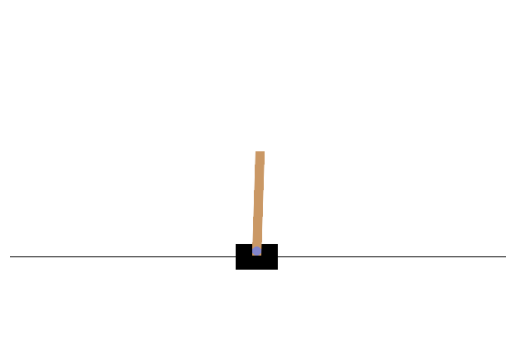

In [4]:
# Be free to test!
# take random actions, and see how the agent moves

env.reset()

action_seq= []

for i in range(1):
  action_number = env.action_space.sample()
  action_seq.append(Actions[action_number])
  info = env.step(action_number)
  print(env.step(action_number))   # Output: (int(s), r, termination, False, {"prob": p})
    # here we Print the results after action
  print("New Observation:", list(info)[0])
  print("Reward:", list(info)[1])
  print("Episode Done:", list(info)[2])

print(' --> '.join(action_seq))
env_screen = env.render(mode = 'rgb_array',)
plt.imshow(env_screen)
plt.axis('off');

# QLearning

Defininig and Tuning Hyperparameters

In [5]:
# Training parameters
n_training_episodes = 10_000  # Total training episodes
learning_rate = 0.01         # Learning rate

# Evaluation parameters
n_eval_episodes = 1_00        # Total number of test episodes

# Environment parameters
gamma = 0.95                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob

Descretizing the continious env

In [ ]:
def discretize_state(state, bins):
    # Discretize each dimension of the continuous state space
    discretized_state = np.digitize(state, bins=bins)
    return tuple(discretized_state)
# Define the number of bins for discretization
num_bins = 20
bins = [np.linspace(-bound, bound, num_bins) for bound in env.observation_space.high]
# Discretize the initial state
state = env.reset()
discretized_state = discretize_state(state, bins)

In [ ]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable
num_actions = env.action_space.n
# Qtable = np.zeros([num_bins[0].size] * len(env.observation_space.high) + [num_actions])


In [7]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable):
    for episode in tqdm(range(n_training_episodes)):
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
        # Reset the environment
        state = env.reset()
        step = 0
        terminated = False

        while not terminated:
          ######################################### Step 2 #################################
            # Choose the action (A_t) using epsilon greedy policy:
            random_num = random.uniform(0,1)
            # if random_num > greater than epsilon --> exploitation
            if random_num > epsilon:
                # Take the action with the highest value given a state
                # np.argmax can be useful here
                action = np.argmax(Qtable[state, :])
            # else --> exploration
            else:
                action = env.action_space.sample()

          ######################################### Step 3 #################################
            # Take action A_t and observe R_t+1 and S_t+1
            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, terminated, info = env.step(action)

          ######################################### Step 4 #################################
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            Qtable[state, action] = Qtable[state, action] + learning_rate * (reward + gamma * np.max(Qtable[new_state, :]) - Qtable[state, action])

            # If terminated or truncated finish the episode
            if terminated:
                break

            # Our next state is the new state
            state = new_state
    return Qtable

In [ ]:
num_try = 2
Qtable_ = np.zeros([num_try, env.observation_space.n, env.action_space.n])
for i in range(num_try):
  Qtable = initialize_q_table(env.observation_space.n, env.action_space.n)
  Qtable_[i,:,:] = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable)

In [10]:
Qtable_

array([[[0.18261161, 0.17180984, 0.17094099, 0.16323326],
        [0.10427457, 0.09805836, 0.09688397, 0.15244162],
        [0.14784484, 0.13337724, 0.1298582 , 0.12420286],
        [0.05275469, 0.05315179, 0.05212607, 0.12472221],
        [0.20806218, 0.14988627, 0.14065381, 0.12837989],
        [0.        , 0.        , 0.        , 0.        ],
        [0.1577711 , 0.11167345, 0.14750589, 0.04293065],
        [0.        , 0.        , 0.        , 0.        ],
        [0.14664649, 0.20687632, 0.19414384, 0.26805474],
        [0.27343613, 0.36698549, 0.28839622, 0.21142253],
        [0.40334153, 0.35735182, 0.26878445, 0.18189807],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.30300644, 0.39768757, 0.49834309, 0.34371394],
        [0.53056603, 0.73394277, 0.67766411, 0.5953108 ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.18313727, 0.17172983, 0.16765094, 0.16225947],
        [0.0

In [11]:
def evaluate_agent(env, n_eval_episodes, Qtable):
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):

    state = env.reset()
    step = 0
    terminated = False
    total_rewards_ep = 0

    while not terminated:
      # Take the action (index) that have the maximum expected future reward given that state
      action = np.argmax(Qtable[state, :])
      new_state, reward, terminated, info = env.step(action)

      total_rewards_ep += reward

      if terminated:
        break
      state = new_state

    episode_rewards.append(total_rewards_ep)

  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [12]:
# Evaluate our Agent
for i in range(Qtable_.shape[0]):
  mean_reward, std_reward = evaluate_agent(env, n_eval_episodes, Qtable_[i,:,:])
  print(f"\nMean_reward = {mean_reward:.2f} +/- {std_reward:.2f}\n")

100%|██████████| 1000/1000 [00:00<00:00, 1186.70it/s]



Mean_reward = 0.71 +/- 0.45



100%|██████████| 1000/1000 [00:00<00:00, 1101.47it/s]



Mean_reward = 0.76 +/- 0.43



100%|██████████| 1000/1000 [00:00<00:00, 1128.57it/s]


Mean_reward = 0.73 +/- 0.44



In [ ]:
# Print sequence of actions that has taken to reach the goal
Qtable_selected = Qtable_[1]
action_sequence=[]
for j in range(Qtable_selected.shape[0]):
    action_sequence.append(Actions[np.argmax(np.array(Qtable_selected)[j, :])])
print(' --> '.join(action_sequence))
env_screen = env.render(mode = 'rgb_array',)
plt.imshow(env_screen)
plt.axis('off');

In [14]:
def train_Sarsa(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable):
    for episode in tqdm(range(n_training_episodes)):
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
        # Reset the environment
        state = env.reset()
        step = 0
        terminated = False

        while not terminated:
          ######################################### Step 2 #################################
            # Choose the action (A_t) using epsilon greedy policy:
            random_num = random.uniform(0,1)
            # if random_num > greater than epsilon --> exploitation
            if random_num > epsilon:
                # Take the action with the highest value given a state
                # np.argmax can be useful here
                action = np.argmax(Qtable[state, :])
            # else --> exploration
            else:
                action = env.action_space.sample()

          ######################################### Step 3 #################################
            # Take action A_t and observe R_t+1 and S_t+1
            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, terminated, info = env.step(action)

          ######################################### Step 4 #################################
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            Qtable[state, action] = Qtable[state, action] + learning_rate * (reward + gamma * np.array(random.choices(Qtable[new_state, :],weights = [1, 1, 1, 1], k = 1)) - Qtable[state, action])

            # If terminated or truncated finish the episode
            if terminated:
                break

            # Our next state is the new state
            state = new_state
    return Qtable

In [15]:
num_try = 3
Qtable_ = np.zeros([num_try, env.observation_space.n, env.action_space.n])
for i in range(num_try):
  Qtable = initialize_q_table(env.observation_space.n, env.action_space.n)
  Qtable_[i,:,:] = train_Sarsa(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, Qtable)

100%|██████████| 50000/50000 [00:34<00:00, 1458.44it/s]


In [ ]:
# Evaluate our Agent
for i in range(Qtable_.shape[0]):
  mean_reward, std_reward = evaluate_agent(env, n_eval_episodes, Qtable_[i,:,:])
  print(f"\nMean_reward = {mean_reward:.2f} +/- {std_reward:.2f}\n")

In [ ]:
# Print sequence of actions that has taken to reach the goal
Qtable_selected = Qtable_[0]
action_sequence=[]
for j in range(Qtable_selected.shape[0]):
    action_sequence.append(Actions[np.argmax(np.array(Qtable_selected)[j, :])])
print(' --> '.join(action_sequence))
env_screen = env.render(mode = 'rgb_array',)
plt.imshow(env_screen)
plt.axis('off');